In [2]:
import numpy as np
import pandas as pd
import os
import glob
from datetime import datetime
# import timestamp
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce



In [3]:

class Data():
    def __init__(self, path = None):
        
        self.directory = (glob.glob("/Data*merged.csv")) 
        # Add All the functionality to the class for organisation
        self.dailyNames = (glob.glob("daily*merged.csv")) 


        self.init()
        self.pdfs = []
        self.dailies = {}
    def init(self):
        for idx, dataName in enumerate(self.directory):
            self.pdfs.append(self.getDF(-1,dataName))

        for idx, data in enumerate(self.dailyNames):
            self.dailies[data]  =self.getDF(data)


    def getDF(self, i, byname =0):
        if(byname != 0):
            return(pd.read_csv(byname))
        return(pd.read_csv(self.directory[i]))





def containTimeInstant():
    timeList = ["time, "]

def read_file(path, expend_print = False, convertTimeDate = False):
    """ 
    read files
    """
    # formatting to pandas
    pd.Timestamp('2014-01-23 00:00:00', tz=None).to_pydatetime()

    print(path)
    
    # read csv
    df  = pd.read_csv(path)
    if(expend_print):
        print(path)
        print(f"Size: {df.shape}")
        print(df.head(10))
        print(df.columns)
        print((df.Id.unique()))
        print((list(df.columns)))
    df.dropna(subset=list(df.columns), how='any', axis=0).reset_index(inplace = True)

    if(convertTimeDate):
        pass

    ID = "Id"
    if ID in list(df.columns):
        # df['date_column'] = pd.to_datetime(df['datetime_column']).dt.date
        return df
    return None


def saved_file(df, name ):
    df.to_csv(f'{name}.csv')

def merge_data_to_one(files, safefile = False, saveFileName = "OutputMerged"):
    outputMerged = pd.DataFrame()
    
    for idx, fileName in enumerate(set(files)):
        data = read_file(fileName)
        if isinstance(data, pd.DataFrame):
            print(fileName)
            if(idx<1):
                outputMerged = data
            else:
                pd.merge(outputMerged, data, on = 'Id', how="left")
    
    if safefile: saved_file(outputMerged, saveFileName)


def compareSimilarity(A, B):
    A.sort()
    B.sort()

    max_val = max([len(A),len(B)])

    if max_val == len(A):arrMax, secondMax =A, B 
    else: arrMax, secondMax =A, B = A, B 
    
    sumCountSimilarities = 0

    sum_=0
    for i in list(arrMax):
        for j in list(secondMax):
            if i==j:
                if i<j : break
                sumCountSimilarities+=1
                break
             
    return (sumCountSimilarities, sumCountSimilarities/max_val)


def compareamountof(lists):
    l = len(lists)
    output = []

    for i in range(l):
        for j in range(i, l):
            A = read_file(lists[i])
            B = read_file(lists[j])


            similarities, ratiosim = compareSimilarity(A.Id.unique(), B.Id.unique())
            output.append([lists[i], lists[j],similarities, ratiosim])

    return output


def divideInsertTime(data, colName):
    # time_col_split = data.colName.str.split(" ")
    # split_amount = len(list(time_col_split[0]))

    date = pd.to_datetime(data[colName])
    try:
        Id_To_Idx = {id :num for num,id in enumerate(Heart_By_Idx.Id.unique())}
        Heart_By_Idx['PersonID'] = data.Id.map(Id_To_Idx)

        data["Hour"] = date.dt.hour
        data["Day"]  = date.dt.day 
        data["Minute"] = date.dt.minute
        data["DateOfWeek"] = date.dt.day_name()      
        print("Date Changed")
    except:
        e = sys.exc_info()
        print(f"Could Not Prase Data: Check Col Name; Erorr: {sys.exc_info()}")        

    return data


def pvalue_test(data, col_name, based_on_col_vals):
    i = 0
    print(f"Based on column: {col_name}")
    for (columnName, columnData) in data.iteritems():
        if i>1:
            stat, p = kendalltau(columnData, based_on_col_vals)
            print('Column Name : ', columnName)
            print(p)
        i +=1
#TODO : Set Index: data.set_index("Id")

In [7]:
dailyData = (glob.glob("../Data/daily*merged.csv"))  +  (glob.glob("../Data/heartrate*merged.csv")) 
data_csvs = (glob.glob("../Data/*merged.csv")) 
data_csvs

['../Data\\dailyActivity_merged.csv',
 '../Data\\dailyCalories_merged.csv',
 '../Data\\dailyIntensities_merged.csv',
 '../Data\\dailySteps_merged.csv',
 '../Data\\heartrate_seconds_merged.csv',
 '../Data\\hourlyCalories_merged.csv',
 '../Data\\hourlyIntensities_merged.csv',
 '../Data\\hourlySteps_merged.csv',
 '../Data\\minuteCaloriesNarrow_merged.csv',
 '../Data\\minuteCaloriesWide_merged.csv',
 '../Data\\minuteIntensitiesNarrow_merged.csv',
 '../Data\\minuteIntensitiesWide_merged.csv',
 '../Data\\minuteMETsNarrow_merged.csv',
 '../Data\\minuteSleep_merged.csv',
 '../Data\\minuteStepsNarrow_merged.csv',
 '../Data\\minuteStepsWide_merged.csv',
 '../Data\\sleepDay_merged.csv',
 '../Data\\weightLogInfo_merged.csv']

## Load the Data

In [45]:
sleep_min_df = read_file(data_csvs[-5])
sleep_min_df['date']= pd.to_datetime(sleep_min_df['date'])
sleep_min_df['day_of_week'] = sleep_min_df.date.apply(lambda x: x.strftime('%w'))
sleep_min_df['DateFull'] = sleep_min_df.date.apply(lambda x: x.strftime('%D'))
sleep_min_df['Minute'] = sleep_min_df.date.apply(lambda x: x.strftime('%H%M'))

../Data\minuteSleep_merged.csv


In [84]:
df_s = sleep_min_df.groupby(['Id','DateFull', 'Minute']).mean().drop(columns = {'logId'})
df_s['v'] = np.array(list(df_s.index))[:,-1]

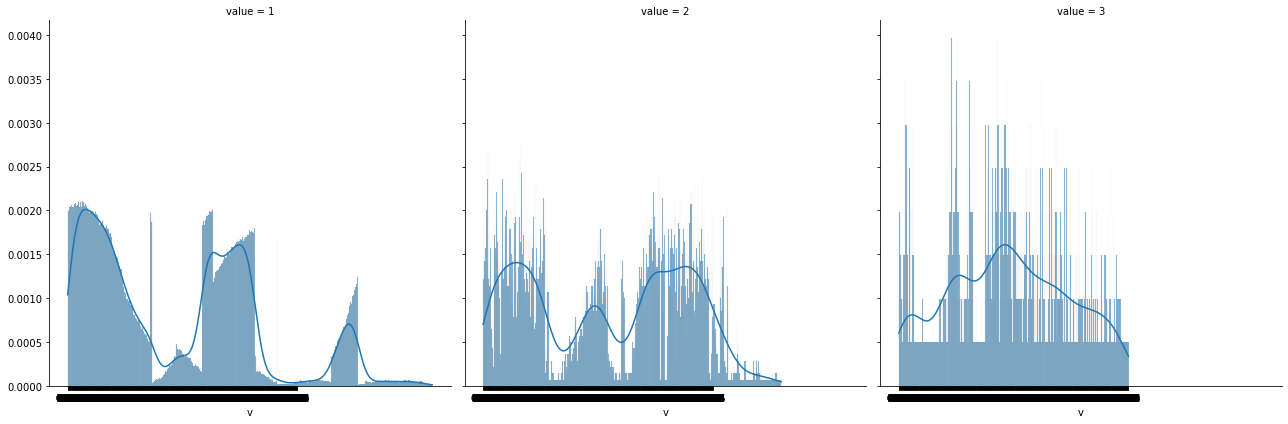

In [85]:
g = sns.FacetGrid(df_s, col="value", height=6, aspect=1)
g.map(sns.histplot, 'v', kde=True, stat='density')

KeyError: "None of [Index(['sedentary_mins'], dtype='object')] are in the [columns]"

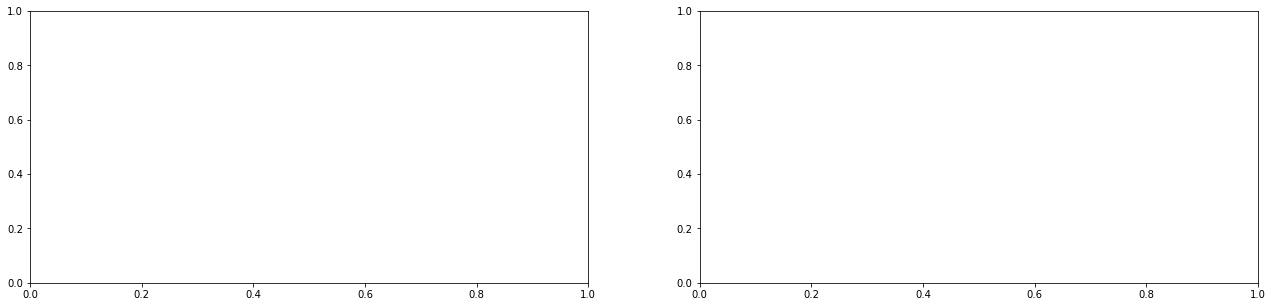

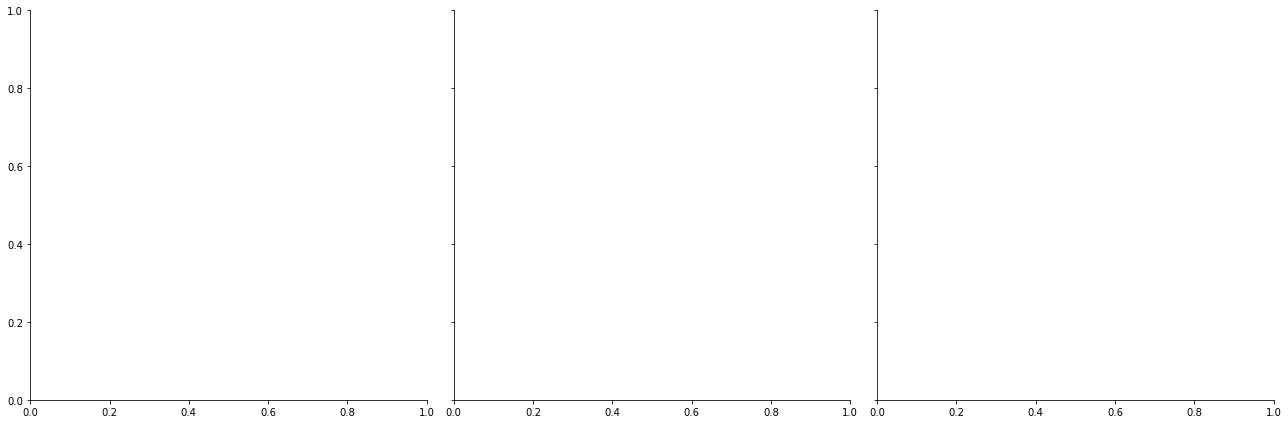

In [61]:


fig, axes = plt.subplots(1, 2, figsize=(22, 5))
g = sns.FacetGrid(sleep_min_df, col="value", height=6, aspect=1)
g.map(sns.histplot, "sedentary_mins", kde=True, stat='density')

In [22]:
weightLogInfo_merged = read_file(data_csvs[-1])
sleep_df = read_file(data_csvs[-2])



../Data\weightLogInfo_merged.csv
../Data\sleepDay_merged.csv


In [33]:
weightLogInfo_merged.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [32]:
sleep_df.head()

,id,sleep_day,total_sleep_records,total_mins_asleep,total_time_in_bed,day_of_week
0,1503960366,2016-04-12,1,327,346,2
1,1503960366,2016-04-13,2,384,407,3
2,1503960366,2016-04-15,1,412,442,5
3,1503960366,2016-04-16,2,340,367,6
4,1503960366,2016-04-17,1,700,712,0


In [27]:

sleep_df.rename(columns={'Id': 'id', 
                         'SleepDay': 'sleep_day', 
                         'TotalSleepRecords': 'total_sleep_records',
                         'TotalMinutesAsleep': 'total_mins_asleep',
                         'TotalTimeInBed': 'total_time_in_bed'}, inplace=True, errors='ignore')

sleep_df['sleep_day'] = pd.to_datetime(sleep_df['sleep_day'])

sleep_df.sleep_day.apply(lambda x: x.strftime('%Y%m%d'))
sleep_df['day_of_week'] = sleep_df.sleep_day.apply(lambda x: x.strftime('%w'))
sleep_df.head()

,id,sleep_day,total_sleep_records,total_mins_asleep,total_time_in_bed,day_of_week
0,1503960366,2016-04-12,1,327,346,2
1,1503960366,2016-04-13,2,384,407,3
2,1503960366,2016-04-15,1,412,442,5
3,1503960366,2016-04-16,2,340,367,6
4,1503960366,2016-04-17,1,700,712,0


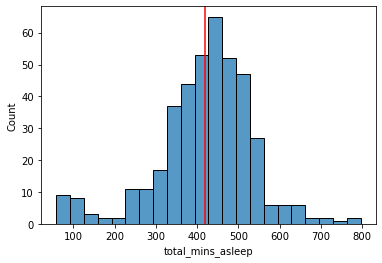

In [28]:
sns.histplot(data = sleep_df, x = 'total_mins_asleep')
plt.axvline(420, 0, 65, color='red');

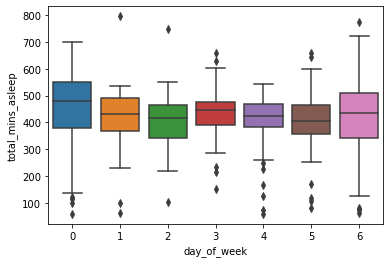

In [29]:
sns.boxplot(x="day_of_week", y="total_mins_asleep", data=sleep_df,
            order = ['0','1','2','3','4','5','6']);

Text(380, 30, '7h of sleep')

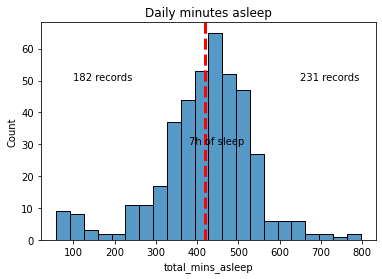

In [30]:
sns.histplot(data = sleep_df, x = 'total_mins_asleep')
plt.title('Daily minutes asleep')

plt.axvline(420, 0, 65, color='red', ls = '--', lw = 3);

plt.annotate('182 records', (100,50))
plt.annotate('231 records', (650,50))
plt.annotate('7h of sleep', (380,30), color='black')

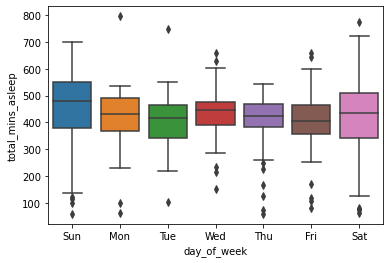

In [31]:
sns.boxplot(x="day_of_week", y="total_mins_asleep", data=sleep_df,
            order = ['0','1','2','3','4','5','6']).set_xticklabels(['Sun','Mon','Tue','Wed','Thu','Fri', 'Sat']);

## Merge With Steps

activity_sleep_df = pd.merge(dailyActivity_df, sleep_df, left_on=  ['id', 'activity_date'],
                   right_on= ['id','sleep_day'], 
                   how = 'left')

# keep only relevant columns
activity_sleep_df = activity_sleep_df[['activity_date', 
                                       'sedentary_mins', 
                                       'lightly_active_mins', 
                                       'total_mins_asleep']
                                     ]

# show first five rows of updated df
activity_sleep_df.head()